#**Shopping Customers Segmantation Machine Learning Project**

**Problem Statement:** Understanding the target customers for the marketing team to plan a strategy.

**Deliverables:** Identification of the most important shopping groups based on income, age and mall shopping score. Also finding the ideal number of groups with a label for each.

**Objectives:** Perform Some EDA.
            Use some Kmeans clustering algorithm to create our segments.
            Use summary statistics on the clusters.
            Visualize.

##**Import Libraries and dataset**

In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [259]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (5).csv


In [260]:
df = pd.read_csv('Mall_Customers.csv')

In [261]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [262]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##**Data Cleaning**

Checking for null, duplicates and irregularities.

In [263]:
pd.isna(df).sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [264]:
df.duplicated().sum()

0

##**Univariate Analysis**

In [265]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [266]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

<ipython-input-267-d00a03a509d2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


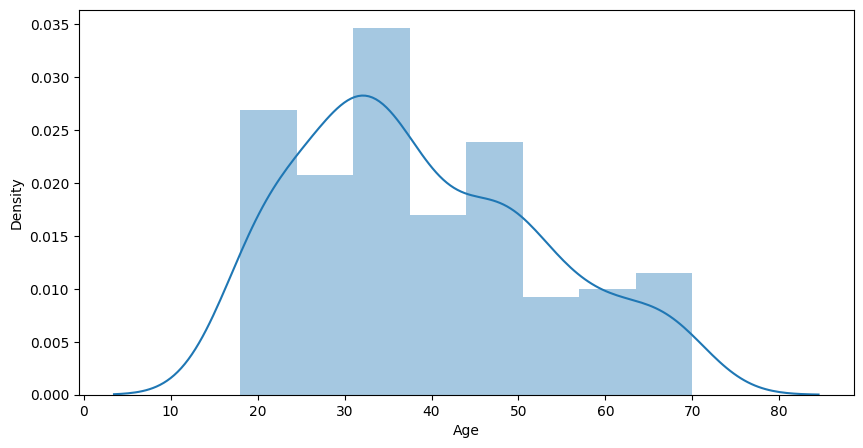

<ipython-input-267-d00a03a509d2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


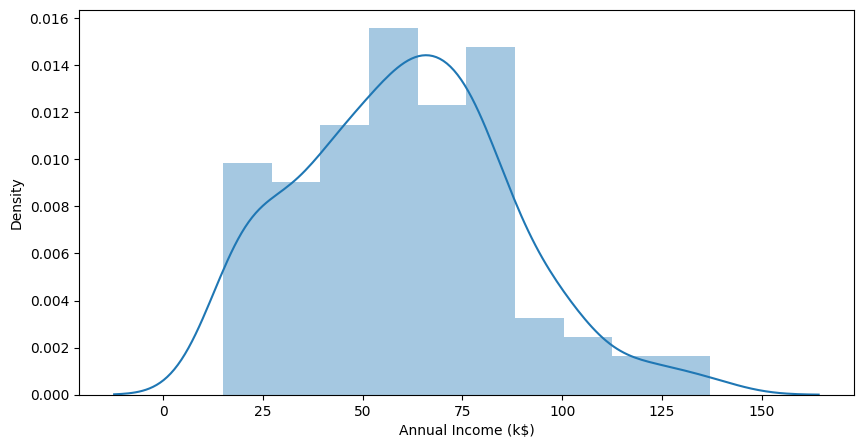

<ipython-input-267-d00a03a509d2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


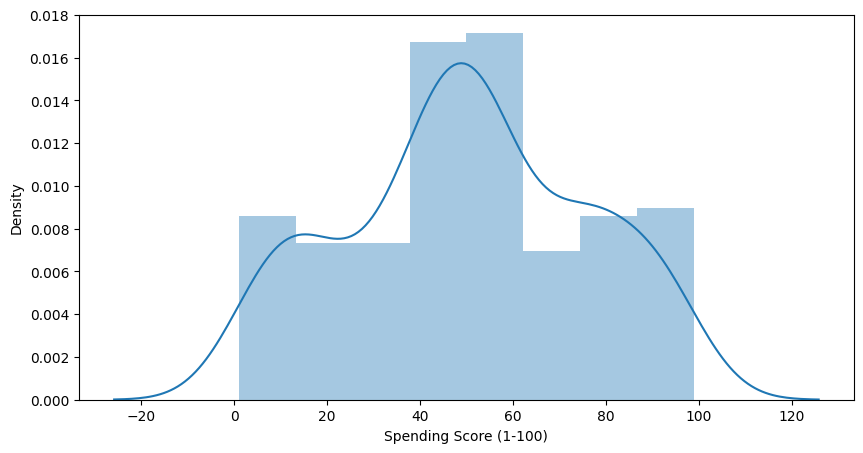

In [267]:
for i in columns:
  plt.figure(figsize=(10,5))
  sns.distplot(df[i])
  plt.show()

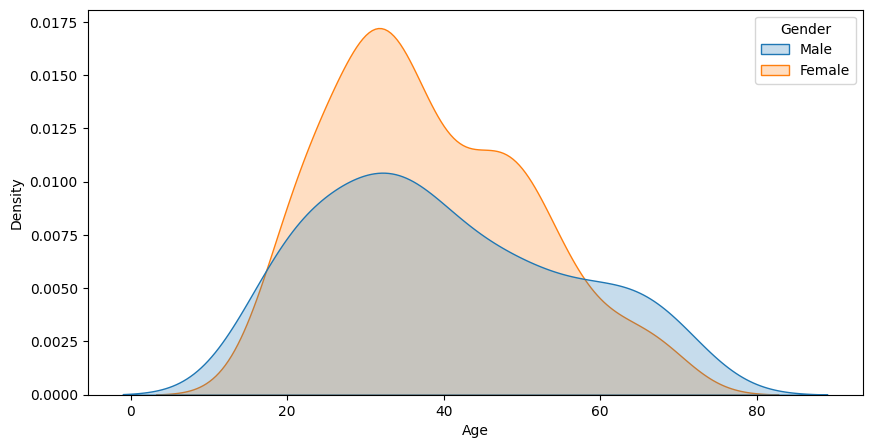

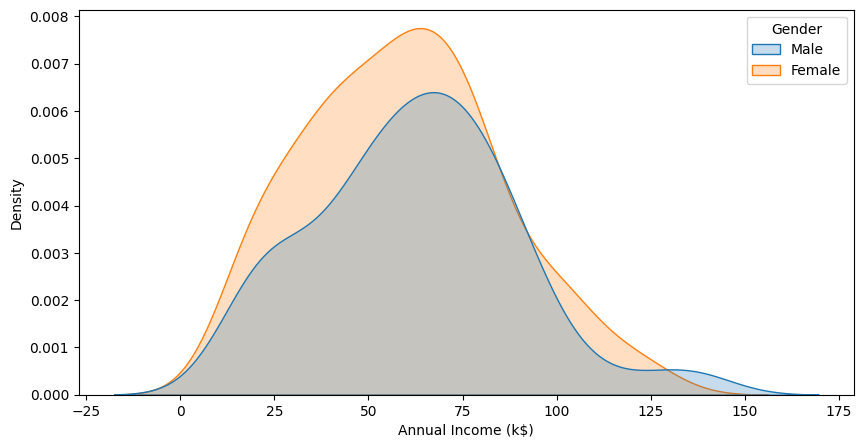

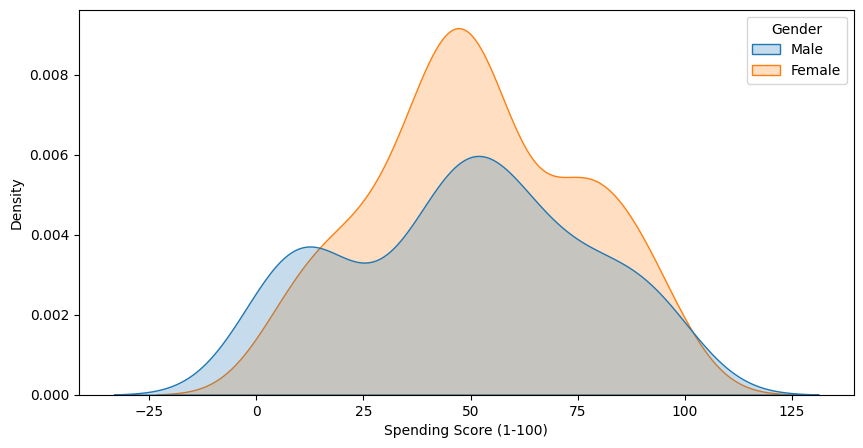

In [268]:
for i in columns:
  plt.figure(figsize=(10,5))
  sns.kdeplot(data=df, x=i, fill=True, hue="Gender")
  plt.show()

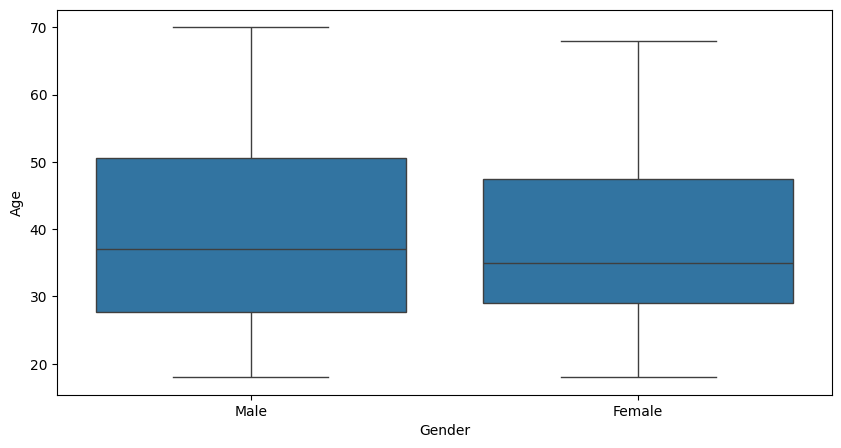

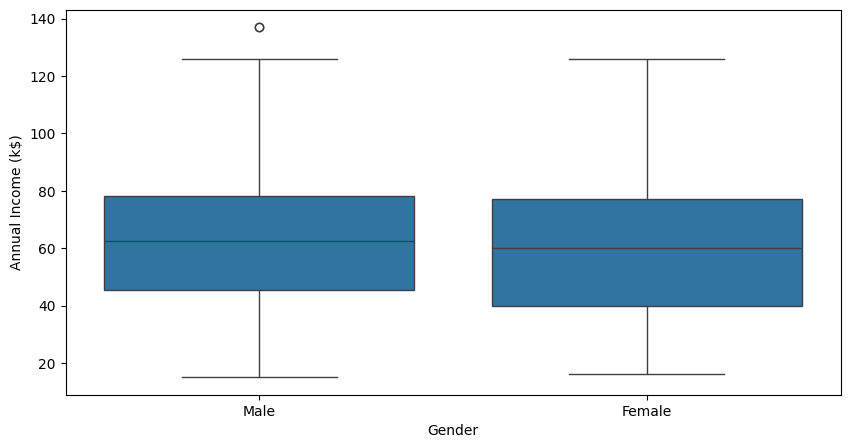

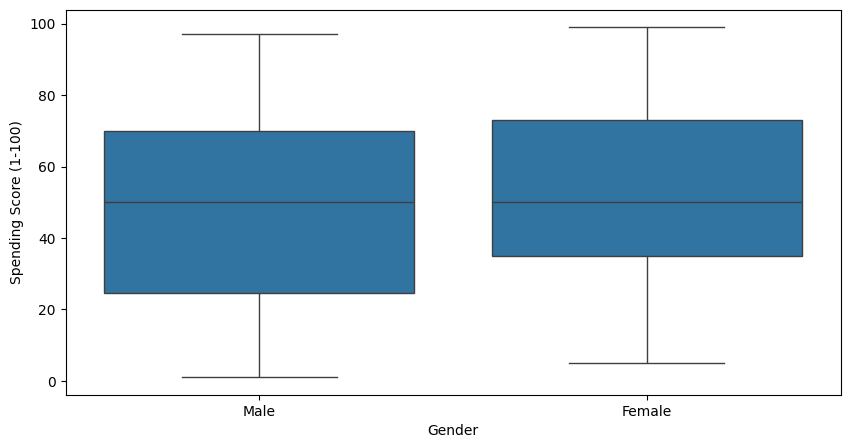

In [269]:
for i in columns:
  plt.figure(figsize=(10,5))
  sns.boxplot(data=df, x="Gender", y=df[i])
  plt.show()

In [270]:
df['Gender'].value_counts(normalize=True)

,proportion
Gender,
Female,0.56
Male,0.44


##**Bivariate Analysis**

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

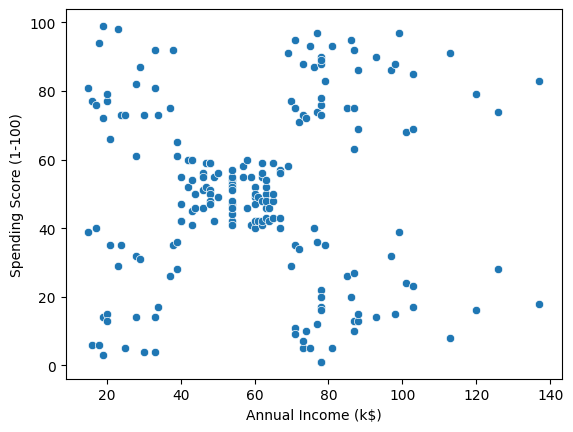

In [271]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

In [272]:
df=df.drop('CustomerID', axis=1)

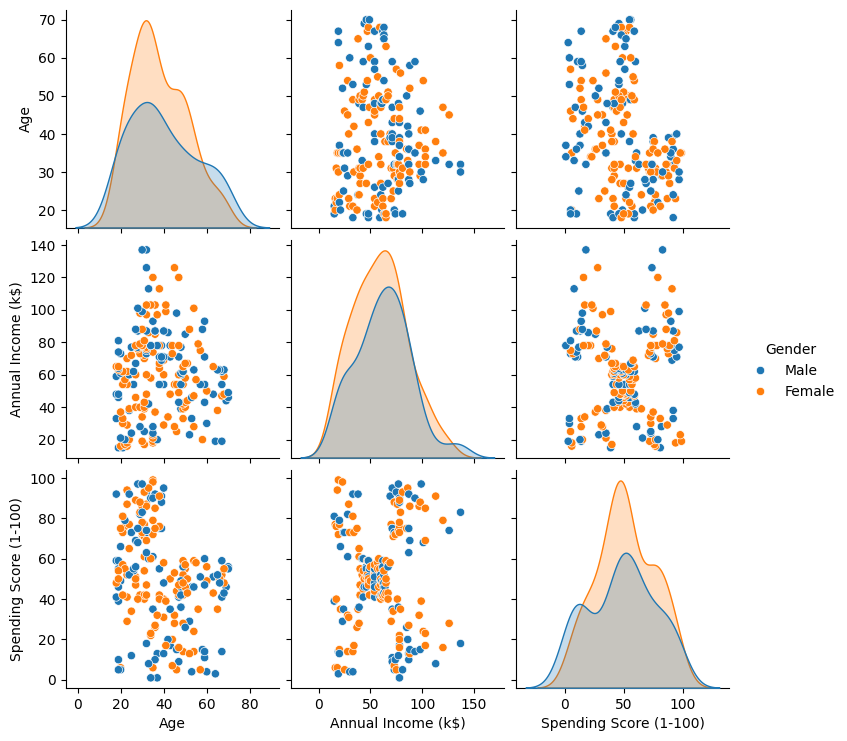

In [273]:
sns.pairplot(df, hue='Gender')

In [274]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [275]:
correlation_matrix = df.drop(columns=['Gender']).corr()

In [276]:
correlation_matrix

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

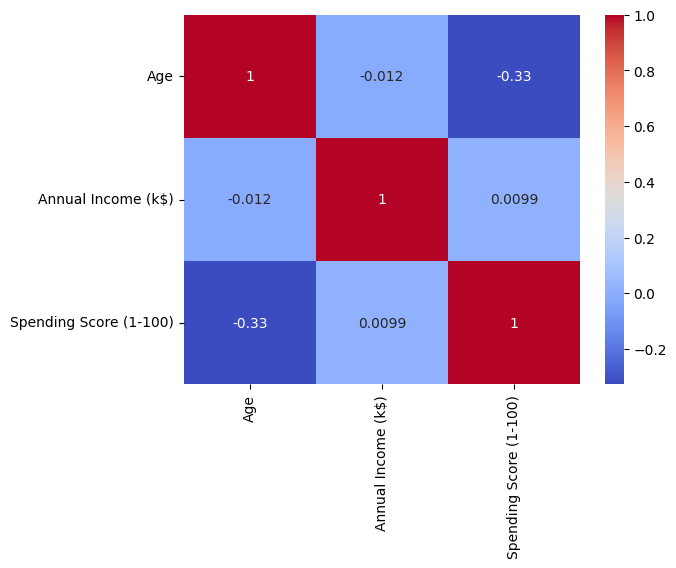

In [277]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

##**Clustering - Univariate**

In [278]:
clustering1 = KMeans()

In [279]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans()

In [280]:
clustering1.labels_    # to view the cluster labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5], dtype=int32)

In [281]:
df['income cluster']=clustering1.labels_  #to add a cloumns that contains each cluster label to the dataframe

In [282]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [283]:
df['income cluster'].value_counts()   #to see how many customers are in each clusters

,count
income cluster,
6,44
0,44
3,28
1,24
7,22
2,18
4,14
5,6


To know the ideal number of clusters using the elbow method

In [284]:
clustering1.inertia_      #to check the distance btw centroids

2961.325396825399

In [285]:
inertia_scores = []                   # to check the inertia score for different cluster size
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df[['Annual Income (k$)']])
  inertia_scores.append(kmeans.inertia_)

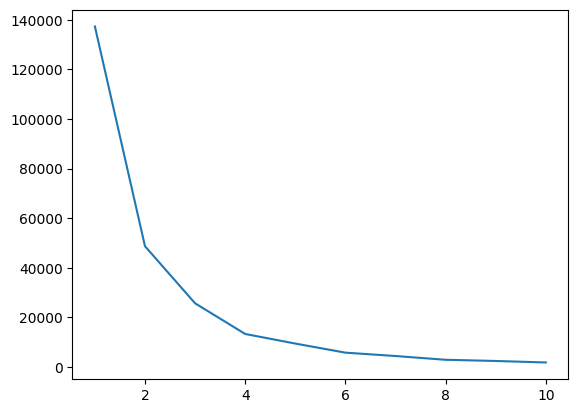

In [286]:
plt.plot(range(1, 11), inertia_scores)    # to visualize the inertia score against the range

We see that 3 is a good number of cluster for our dataframe

In [287]:
clustering1_new = KMeans(n_clusters=3)        # using the cluster of 3 to redo the process
clustering1_new.fit(df[['Annual Income (k$)']])
df['income clusters']=clustering1_new.labels_

In [288]:
df.groupby(['income clusters'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()  # to check the mean based on our cluster

,Age,Annual Income (k$),Spending Score (1-100)
income clusters,,,
0,41.279070,60.906977,50.337209
1,36.910714,92.142857,50.517857
2,37.120690,29.551724,49.689655


In [289]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,income clusters
0,Male,19,15,39,1,2
1,Male,21,15,81,1,2
2,Female,20,16,6,1,2
3,Female,23,16,77,1,2
4,Female,31,17,40,1,2


In [290]:
df=df.drop('income cluster', axis=1)

##**Clustering - Bivariate**

In [291]:
clustering2 = KMeans()
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['income and spending score cluster']=clustering2.labels_

In [292]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income clusters,income and spending score cluster
0,Male,19,15,39,2,2
1,Male,21,15,81,2,3
2,Female,20,16,6,2,2
3,Female,23,16,77,2,3
4,Female,31,17,40,2,2


In [293]:
inertia_scores2 = []                   # to check the inertia score for different cluster size
for i in range(1, 11):
  kmeans2 = KMeans(n_clusters=i)
  kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
  inertia_scores2.append(kmeans2.inertia_)

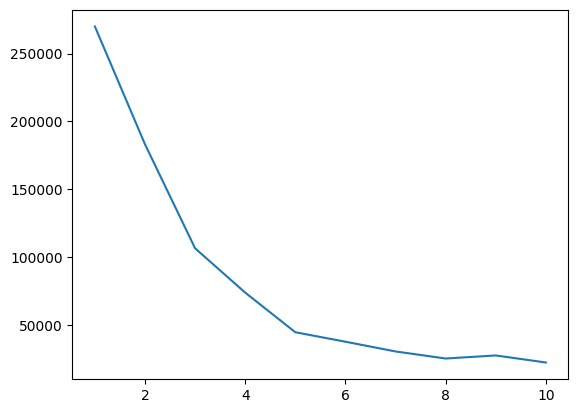

In [294]:
plt.plot(range(1, 11), inertia_scores2)    # to visualize the inertia score against the range

In [295]:
clustering2_new = KMeans(n_clusters=5)
clustering2_new.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['income and spending score clusters']=clustering2_new.labels_

In [296]:
df.groupby(['income and spending score clusters'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()  # to check the mean based on our cluster

,Age,Annual Income (k$),Spending Score (1-100)
income and spending score clusters,,,
0,42.937500,55.087500,49.712500
1,40.666667,87.750000,17.583333
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


In [297]:
centers = pd.DataFrame(clustering2_new.cluster_centers_)
centers.columns = ['x', 'y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

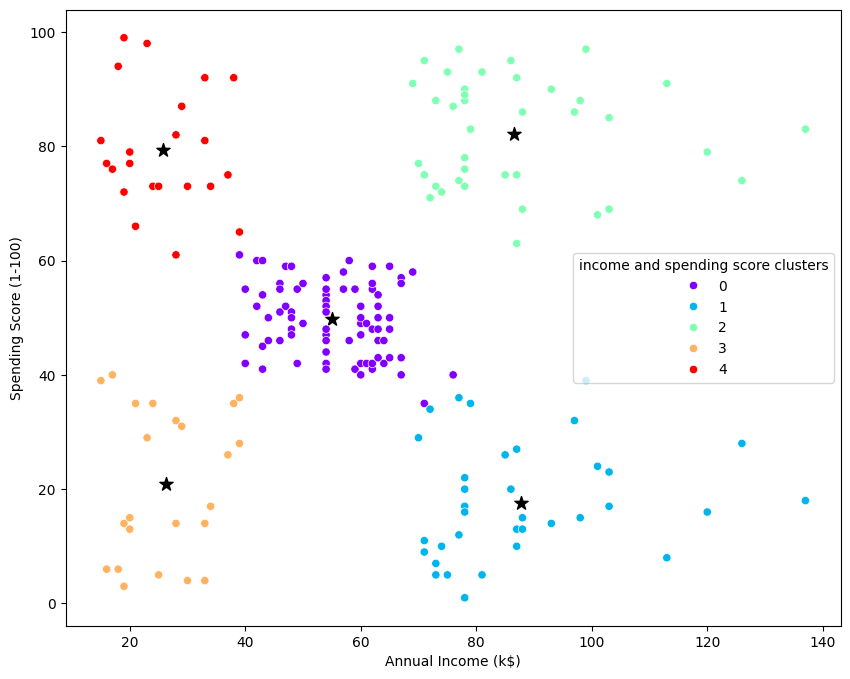

In [298]:
plt.figure(figsize=(10,8))
plt.scatter(centers['x'], centers['y'], s=100, color='black', marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='income and spending score clusters', palette='rainbow')

In [299]:
pd.crosstab(df['income and spending score clusters'], df['Gender'], normalize='index')

Gender,Female,Male
income and spending score clusters,,
0,0.587500,0.412500
1,0.472222,0.527778
2,0.538462,0.461538
3,0.608696,0.391304
4,0.590909,0.409091


##**Clustering - Multivariate**

In [300]:
from sklearn.preprocessing import StandardScaler

In [301]:
scale = StandardScaler()

In [302]:
df['gender_numeric'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [303]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'income clusters', 'income and spending score cluster',
       'income and spending score clusters', 'gender_numeric'],
      dtype='object')

In [304]:
dff = df[['gender_numeric', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [305]:
dff.head()

,gender_numeric,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [306]:
dff = pd.DataFrame(scale.fit_transform(dff))

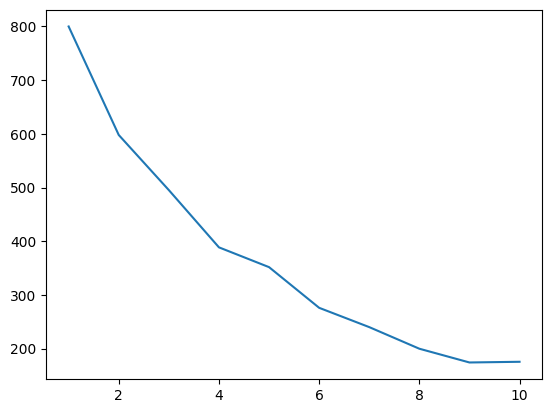

In [307]:
inertia_scores3 = []                   # to check the inertia score for different cluster size
for i in range(1, 11):
  kmeans3 = KMeans(n_clusters=i)
  kmeans3.fit(dff)
  inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1, 11), inertia_scores3)    # to visualize the inertia score against the range

In [308]:
clustering3_new = KMeans(n_clusters=4)
clustering3_new.fit(dff)
dff['multivariate_clusters']=clustering3_new.labels_

In [309]:
dff

,0,1,2,3,multivariate_clusters
0,1.128152,-1.424569,-1.738999,-0.434801,2
1,1.128152,-1.281035,-1.738999,1.195704,2
2,-0.886405,-1.352802,-1.700830,-1.715913,3
3,-0.886405,-1.137502,-1.700830,1.040418,2
4,-0.886405,-0.563369,-1.662660,-0.395980,3
...,...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061,1
196,-0.886405,0.441365,2.497807,-0.861839,1
197,1.128152,-0.491602,2.497807,0.923953,0
198,1.128152,-0.491602,2.917671,-1.250054,0


<Axes: xlabel='2', ylabel='3'>

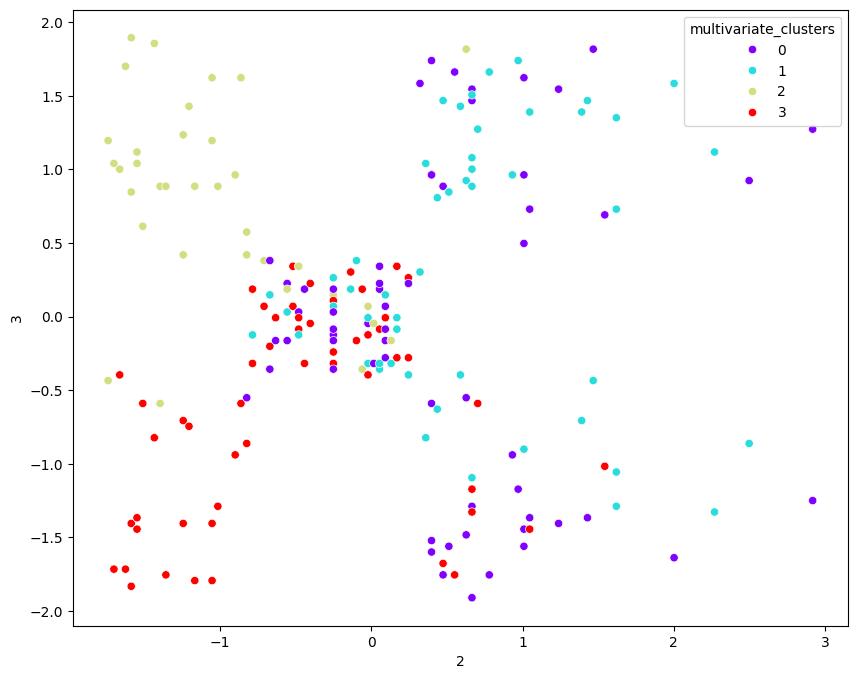

In [312]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=dff, x=2, y=3, hue='multivariate_clusters', palette='rainbow')